# Imports

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('.')))
sys.path.append(os.path.dirname(os.path.dirname((os.path.abspath('.')))))
import torch.optim as optim
import torch.nn.functional as F

from src.data.dataloader import fetch_mnist_loader, fetch_cifar_loader
from src.model.normalizing_flow.classic.flow_yannis import FlowModel, train_flow_inverse_noise, restore_noisy_data, restore_blur_data, restore_lostdata_data, train_flow_inverse_lostdata, train_flow_inverse_blur
from src.utils.viz import display_restoration_process

# Load the dataset

In [2]:
data_train_loader, data_test_loader, (n_channels, n_rows, n_cols) = fetch_cifar_loader(
    n_samples_train=1000,
    n_samples_test=1000,
    batch_size=256,
    path_to_data="../../src/data/"
)


Files already downloaded and verified
Files already downloaded and verified


# Train and test

In [14]:
# Define the encoding dimension
z_dim = 200
conv_sizes, conv_kernel_sizes,conv_strides
# Create the model
model = FlowModel(
    flows=['PlanarFlow'] * 2 + ['RadialFlow'] * 2,
    hidden_sizes_encoder=[256, 128, 128],
    hidden_sizes_decoder=[128, 128, 256],
    z_dim=z_dim,
    n_channels=n_channels,
    n_rows=n_rows,
    n_cols=n_cols,
    activation=F.elu
)

## Noise restoration

In [83]:
#Conv parameters
conv_sizes = [3, 32, 32]
conv_kernel_sizes = [(3,3),(3,3)]
conv_strides = [(1,1),(1,1)]

# Define the encoding dimension
z_dim = 200

# Create the model
model = FlowModel(
    flows=['PlanarFlow'] * 2 + ['RadialFlow'] * 2,
    hidden_sizes_encoder=[32768, 128, 128],
    hidden_sizes_decoder=[128, 128, 32768],
    z_dim=z_dim,
    n_channels=n_channels,
    n_rows=n_rows,
    n_cols=n_cols,
    conv_sizes = conv_sizes, 
    conv_kernel_sizes = conv_kernel_sizes,
    conv_strides = conv_strides,
    activation=F.elu
)

# Set the noise parameters
noise_mean = 0.1
noise_std = 0.1

# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train the model
n_epoch = 3000
model = train_flow_inverse_noise(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    noise_mean=noise_mean,
    noise_std=noise_std
)


[*] Epoch: 0 Average loss: 151.9864
[*] Epoch: 10 Average loss: 125.9944


KeyboardInterrupt: 

In [23]:
# Set the noise parameters
noise_mean = 0.1
noise_std = 0.1

# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=5e-5)

# Train the model
n_epoch = 3000
model = train_flow_inverse_noise(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    noise_mean=noise_mean,
    noise_std=noise_std
)


[*] Epoch: 0 Average loss: 16.3644
[*] Epoch: 10 Average loss: 15.9681
[*] Epoch: 20 Average loss: 15.9756
[*] Epoch: 30 Average loss: 16.0125
[*] Epoch: 40 Average loss: 15.8747
[*] Epoch: 50 Average loss: 16.0779
[*] Epoch: 60 Average loss: 15.9760
[*] Epoch: 70 Average loss: 15.8198
[*] Epoch: 80 Average loss: 15.9090
[*] Epoch: 90 Average loss: 15.7916
[*] Epoch: 100 Average loss: 15.8397
[*] Epoch: 110 Average loss: 15.8845
[*] Epoch: 120 Average loss: 15.8698
[*] Epoch: 130 Average loss: 15.7934
[*] Epoch: 140 Average loss: 15.8103
[*] Epoch: 150 Average loss: 16.1549
[*] Epoch: 160 Average loss: 15.7329
[*] Epoch: 170 Average loss: 15.7499
[*] Epoch: 180 Average loss: 15.8998
[*] Epoch: 190 Average loss: 15.8501
[*] Epoch: 200 Average loss: 15.8490
[*] Epoch: 210 Average loss: 16.0267
[*] Epoch: 220 Average loss: 15.6928
[*] Epoch: 230 Average loss: 15.6526
[*] Epoch: 240 Average loss: 15.7925
[*] Epoch: 250 Average loss: 15.9325
[*] Epoch: 260 Average loss: 15.9972
[*] Epoch: 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


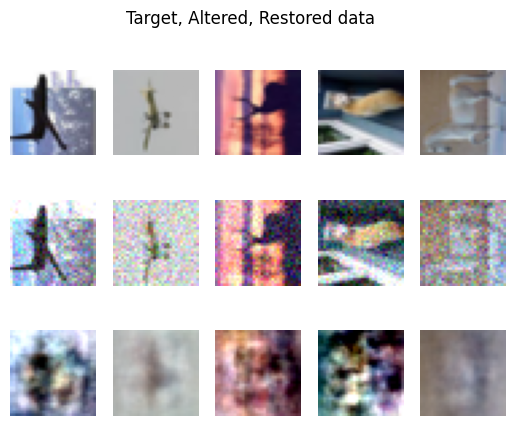

In [24]:
# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_noisy_data(
    model,
    data_test_loader,
    noise_mean=noise_mean,
    noise_std=noise_std
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


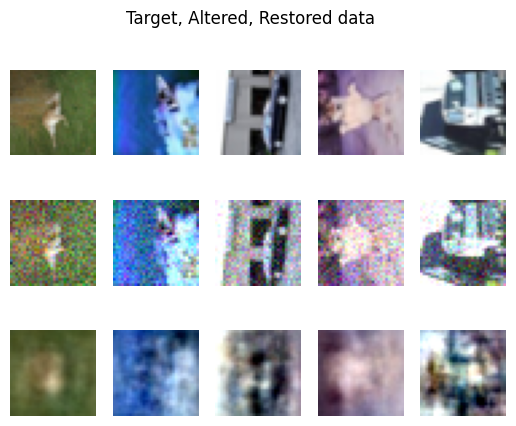

In [50]:
# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_noisy_data(
    model,
    data_test_loader,
    noise_mean=noise_mean,
    noise_std=noise_std
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)

## Lost data restoration

In [22]:
# Set the alteration parameters
square_size = 7

# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=10e-4)

# Train the model
n_epoch = 500
model = train_flow_inverse_lostdata(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    square_size=square_size
)

[*] Epoch: 0 Average loss: 0.0043
[*] Epoch: 1 Average loss: -0.0018
[*] Epoch: 2 Average loss: -0.0052
[*] Epoch: 3 Average loss: -0.0050
[*] Epoch: 4 Average loss: -0.0056
[*] Epoch: 5 Average loss: -0.0062
[*] Epoch: 6 Average loss: -0.0045
[*] Epoch: 7 Average loss: -0.0073
[*] Epoch: 8 Average loss: -0.0068
[*] Epoch: 9 Average loss: -0.0071
[*] Epoch: 10 Average loss: -0.0058
[*] Epoch: 11 Average loss: -0.0071
[*] Epoch: 12 Average loss: -0.0065
[*] Epoch: 13 Average loss: -0.0073
[*] Epoch: 14 Average loss: -0.0078
[*] Epoch: 15 Average loss: -0.0077
[*] Epoch: 16 Average loss: -0.0068
[*] Epoch: 17 Average loss: -0.0075
[*] Epoch: 18 Average loss: -0.0072
[*] Epoch: 19 Average loss: -0.0068
[*] Epoch: 20 Average loss: -0.0078
[*] Epoch: 21 Average loss: -0.0073
[*] Epoch: 22 Average loss: -0.0078
[*] Epoch: 23 Average loss: -0.0074
[*] Epoch: 24 Average loss: -0.0071
[*] Epoch: 25 Average loss: -0.0078
[*] Epoch: 26 Average loss: -0.0068
[*] Epoch: 27 Average loss: -0.0081
[*]

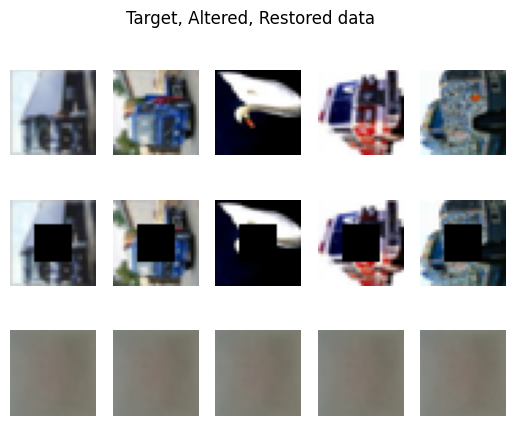

In [24]:


# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_lostdata_data(
    model,
    data_test_loader,
    square_size=square_size
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)

## Gaussian blur restoration

In [14]:
# Set the blur parameters
kernel_size = 7
sigma = 5
# Define the optimizer of the model
optimizer = optim.Adam(model.parameters(), lr=10e-4)

# Train the model
n_epoch = 500
model = train_flow_inverse_blur(
    model,
    optimizer,
    data_train_loader,
    n_epoch=n_epoch,
    kernel_size=kernel_size,
    sigma=sigma
)


[*] Epoch: 0 Average loss: 1711.5124
[*] Epoch: 1 Average loss: 1531.0918
[*] Epoch: 2 Average loss: 1511.8084
[*] Epoch: 3 Average loss: 1507.7573
[*] Epoch: 4 Average loss: 1483.7554
[*] Epoch: 5 Average loss: 1471.9146
[*] Epoch: 6 Average loss: 1470.5526
[*] Epoch: 7 Average loss: 1459.8638
[*] Epoch: 8 Average loss: 1454.5270
[*] Epoch: 9 Average loss: 1451.2835
[*] Epoch: 10 Average loss: 1444.7996
[*] Epoch: 11 Average loss: 1444.9186
[*] Epoch: 12 Average loss: 1439.5558
[*] Epoch: 13 Average loss: 1437.9725
[*] Epoch: 14 Average loss: 1432.5367
[*] Epoch: 15 Average loss: 1436.4593
[*] Epoch: 16 Average loss: 1430.1482
[*] Epoch: 17 Average loss: 1428.0477
[*] Epoch: 18 Average loss: 1425.1964
[*] Epoch: 19 Average loss: 1426.4599
[*] Epoch: 20 Average loss: 1418.8041
[*] Epoch: 21 Average loss: 1417.1658
[*] Epoch: 22 Average loss: 1427.7077
[*] Epoch: 23 Average loss: 1422.7469
[*] Epoch: 24 Average loss: 1421.7492
[*] Epoch: 25 Average loss: 1415.7273
[*] Epoch: 26 Average 

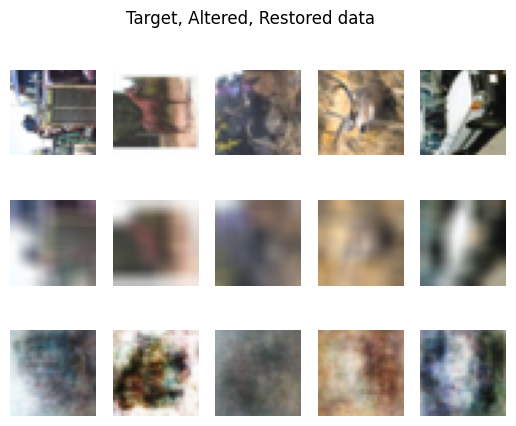

In [16]:
# Try restoring data from the test set with the same noise applied as for the training set
target_data_list, noisy_data_list, restored_data_list = restore_blur_data(
    model,
    data_test_loader,
    kernel_size=kernel_size,
    sigma=sigma
)

# Display the results
display_restoration_process(
    target_data_list,
    noisy_data_list,
    restored_data_list,
    transpose = True,
    max_samples=5
)
